# Parkinson's Disease


---


**This project is part of the Udemy course "Machine Learning in Healthcare"**


---


The dataset can be found [here](https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection). 

The dataset is very small, with only about 195 entries, and consists of the following columns:
1. name - ASCII subject name and recording number.
2. MDVP:Fo(Hz) - Average vocal fundamental frequency.
3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency.
4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency.
5. MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several
measures of variation in fundamental frequency.
6. MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - Several measures of variation in amplitude.
7. NHR, HNR - Two measures of ratio of noise to tonal components in the voice.
8. status: Health status of the subject (one) - Parkinson's, (zero) - Healthy.
9. RPDE, D2 - Two nonlinear dynamical complexity measures.
10. DFA - Signal fractal scaling exponent.
11. spread1, spread2, PPE - Three nonlinear measures of fundamental frequency variation.

Parkinson's disease is a chronic neurodegenerative disease that affects the neurons in the brain that contain dopamine and does not have cure. It affects the patients' movements and causes stiffness and tremor.

We would like to predict whether the patient has Parkinson's disease or not, given the various factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Parkinson's Disease Prediction Dataset/Parkinson_disease.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


We drop the name:

In [3]:
data.drop('name', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

There are no null values.

Check the target variable, status:

Target variable count: 
1    147
0     48
Name: status, dtype: int64


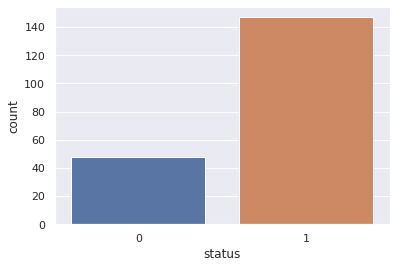

In [4]:
sns.countplot(x = 'status', data = data)
print('Target variable count: ')
print(data['status'].value_counts())

It seems that there are a lot of candidates who suffer from Parkinson's disease rather than Healthy candidates. Thus, any predictions could be skewed towards detecting patients with Parkinson's. This could infact lead to a large number of False Negatives.

Let us find the correlation:

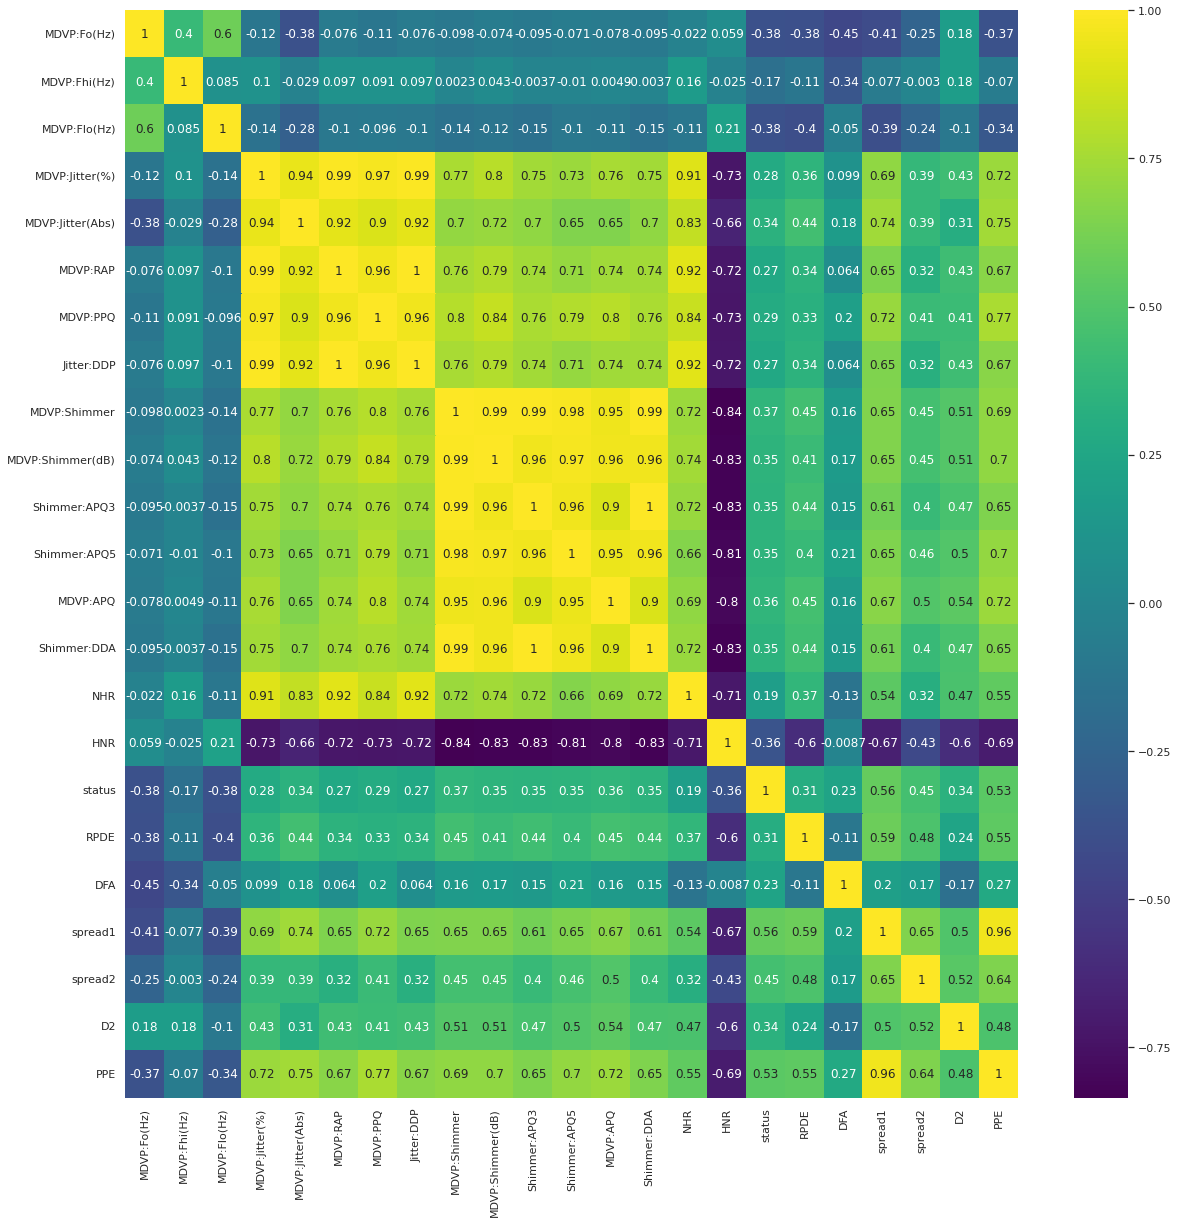

In [5]:
plt.figure(figsize = (20, 20))
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)

We see that there are a lot of correlations between the different MDVP variables as well as between spread1 and PPE.

## Split the Features and Targets

In [6]:
x_data = data.drop('status', axis = 1)
print('Shape of Features: ', x_data.shape)
y_data = data['status']
print('Shape of the target: ', y_data.shape)

Shape of Features:  (195, 22)
Shape of the target:  (195,)


## Normalization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_data)
x = scaler.transform(x_data)
x = pd.DataFrame(x, columns = x_data.columns)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

## Feature Selection

There are negative values in features columns. Since Chi2 uses frequency distribution and frequency cannot be negative, we can either transform the data or choose an alternative scoring method such as f_classif which computes the ANOVA f-value or mutual_info_classif which computes the mutual information. 

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif
x_Features = SelectKBest(f_classif).fit(x, y_data)
score_df = pd.DataFrame({'Features': x.columns, 'Score': x_Features.scores_}).sort_values('Score', ascending=False)
score_df

,Features,Score
18,spread1,90.424219
21,PPE,75.803195
19,spread2,50.343165
0,MDVP:Fo(Hz),33.286577
2,MDVP:Flo(Hz),32.612875
8,MDVP:Shimmer,30.122600
12,MDVP:APQ,29.536350
15,HNR,29.015927
11,Shimmer:APQ5,27.145033
9,MDVP:Shimmer(dB),27.065484


We can choose the features that have scores above or around 26, i.e., The first 11 components. 

In [9]:
X_features = SelectKBest(f_classif, k=11)
X_transform = X_features.fit_transform(x, y_data)
filter = X_features.get_support()
filtered_x = np.array(x.columns[filter])
data_copy = x.copy()
for col in data_copy.columns:
  if col not in filtered_x:
    data_copy.drop(col, axis = 1, inplace = True)
data_copy.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'HNR', 'spread1', 'spread2',
       'PPE'],
      dtype='object')

In [10]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Flo(Hz)      195 non-null    float64
 2   MDVP:Shimmer      195 non-null    float64
 3   MDVP:Shimmer(dB)  195 non-null    float64
 4   Shimmer:APQ3      195 non-null    float64
 5   Shimmer:APQ5      195 non-null    float64
 6   MDVP:APQ          195 non-null    float64
 7   HNR               195 non-null    float64
 8   spread1           195 non-null    float64
 9   spread2           195 non-null    float64
 10  PPE               195 non-null    float64
dtypes: float64(11)
memory usage: 16.9 KB


In [11]:
x = data_copy.values
y = data['status'].values

## Split into Test and Train sets

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('Shape x_train: ', x_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape x_test: ', x_test.shape)
print('Shape y_test: ', y_test.shape)

Shape x_train:  (156, 11)
Shape y_train:  (156,)
Shape x_test:  (39, 11)
Shape y_test:  (39,)


## ML Techniques - Imbalanced Dataset

We do not perform Pruning on the Imbalanced data; we would like to know how the performance changes in a general manner.

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score

### k-Nearest Neighbours

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier(n_neighbors = 8)
kNN_classifier.fit(x_train, y_train)
y_pred_kNN = kNN_classifier.predict(x_test)
kNN_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

In [15]:
y_pred_kNN_train = kNN_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_kNN_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_kNN))

Accuracy of the train set:  0.9294871794871795
Accuracy of the test set:  0.9230769230769231


In [16]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



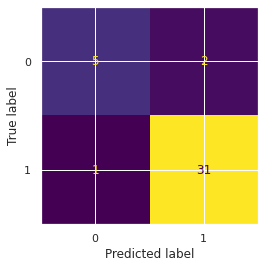

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_kNN, colorbar = False)

### Naive Bayes

In [18]:
from sklearn.naive_bayes import BernoulliNB
NB_classifier = BernoulliNB()
NB_classifier.fit(x_train, y_train)
y_pred_NB = NB_classifier.predict(x_test)

In [19]:
y_pred_NB_train = NB_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_NB_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_NB))

Accuracy of the train set:  0.7435897435897436
Accuracy of the test set:  0.8717948717948718


In [20]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.97      0.88      0.92        32

    accuracy                           0.87        39
   macro avg       0.78      0.87      0.81        39
weighted avg       0.90      0.87      0.88        39



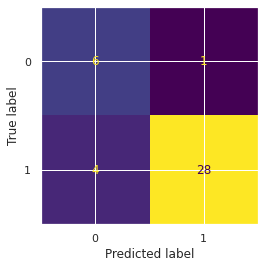

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_NB, colorbar = False)

### Support Vector Machine

In [22]:
from sklearn.svm import SVC
SVM_classifier = SVC()
SVM_classifier.fit(x_train, y_train)
y_pred_SVM = SVM_classifier.predict(x_test)
SVM_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [23]:
y_pred_SVM_train = SVM_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_SVM_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_SVM))

Accuracy of the train set:  0.8653846153846154
Accuracy of the test set:  0.8974358974358975


In [24]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



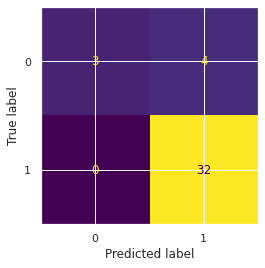

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVM, colorbar = False)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(x_train, y_train)
y_pred_LR = LR_classifier.predict(x_test)
LR_classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
y_pred_LR_train = LR_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_LR_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_LR))

Accuracy of the train set:  0.8397435897435898
Accuracy of the test set:  0.8974358974358975


In [28]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



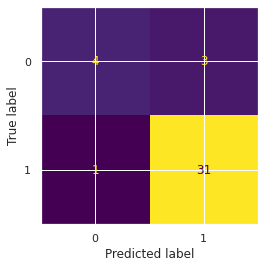

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR, colorbar = False)

### Decision Tree 

In [30]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(random_state = 42)
DT_classifier.fit(x_train, y_train)
y_pred_DT = DT_classifier.predict(x_test)
DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [31]:
y_pred_DT_train = DT_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_DT_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_DT))

Accuracy of the train set:  1.0
Accuracy of the test set:  0.8974358974358975


There is overfitting, as evident between the huge difference between the accuracy of the training and testing datasets. 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39



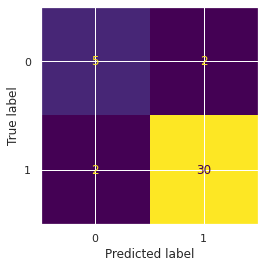

In [32]:
print(classification_report(y_test, y_pred_DT))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT, colorbar=False)

### Random Forests

In [33]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(random_state=42)
RF_classifier.fit(x_train, y_train)
y_pred_RF = RF_classifier.predict(x_test)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [34]:
y_pred_RF_train = RF_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_RF_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_RF))

Accuracy of the train set:  1.0
Accuracy of the test set:  0.9230769230769231


Again, this is a case of overfitting.

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



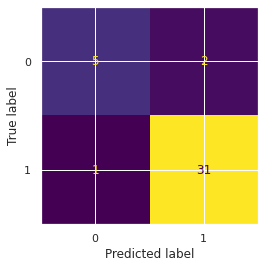

In [35]:
print(classification_report(y_test, y_pred_RF))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF, colorbar=False)

### Accuracy

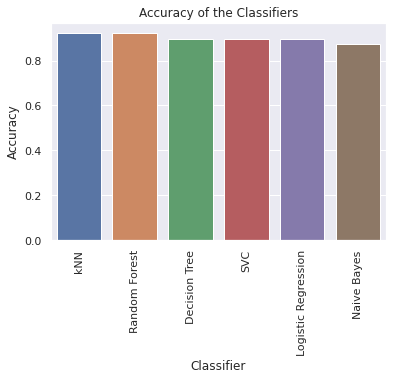

In [36]:
accuracy_df = pd.DataFrame()
accuracy_df['Classifier'] = ['Decision Tree', 'kNN', 'Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest']
accuracy_df['Accuracy'] = [accuracy_score(y_test, y_pred_DT), accuracy_score(y_test, y_pred_kNN), accuracy_score(y_test, y_pred_NB), 
                           accuracy_score(y_test, y_pred_SVM), accuracy_score(y_test, y_pred_LR), accuracy_score(y_test, y_pred_RF)]

sns.barplot(y = 'Accuracy', x = 'Classifier', data = accuracy_df, order = accuracy_df.sort_values('Accuracy', ascending = False).Classifier)
plt.title('Accuracy of the Classifiers')
plt.xticks(rotation=90)
plt.show()

kNN and Random Forest Classifiers performs the best amongst the algorithms that we have implemented on the dataset with imbalanced target class. They are followed by SVC.

### ROC Curve

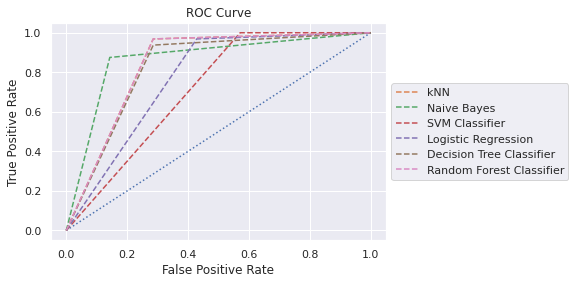

In [37]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_NB)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_SVM)
plt.plot(fpr3, tpr3, '--', label='SVM Classifier')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_LR)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_DT)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(y_test, y_pred_RF)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

Naive Bayes Classifier has a better ROC Curve compared to the rest of the algorithms we have implemented. However, considering the accuracy and the ROC Curve, Random Forest Classifier could be a better option, since we have to take into account the False positives when dealing with healthcare.

## Balancing the Target Class - Oversampling Technique

In [38]:
from imblearn.over_sampling import ADASYN
from collections import Counter
oversample = ADASYN()
X,Y = oversample.fit_resample(x,y)
Counter(Y)

Counter({1: 147, 0: 154})

Split into train and test sets:

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size = 0.2)
print('x_train shape: ', X_train.shape)
print('x_test shape: ', X_test.shape)
print('y_train shape: ', Y_train.shape)
print('y_test shape: ', Y_test.shape)

x_train shape:  (240, 11)
x_test shape:  (61, 11)
y_train shape:  (240,)
y_test shape:  (61,)


Standardize:

In [40]:
scaler_balanced = StandardScaler()
scaler_balanced.fit(X_train)
X_train_PCA = scaler_balanced.transform(X_train)
X_test_PCA = scaler_balanced.transform(X_test)

## ML Techniques - Balanced Target class

### k-Neighbours Classifier

We can quickly tweak the n_neighbors to prevent overfitting.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier_balanced = KNeighborsClassifier()
kNN_classifier_balanced.fit(X_train, Y_train)
kNN_classifier_balanced.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [42]:
y_pred_kNN_balanced = kNN_classifier_balanced.predict(X_test)
y_pred_kNN_train_balanced = kNN_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_kNN_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_kNN_balanced))

Accuracy of the training set:  0.9375
Accuracy of the testing set:  0.9344262295081968


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.87      0.93        31

    accuracy                           0.93        61
   macro avg       0.94      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



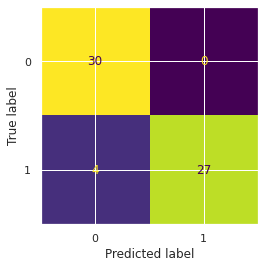

In [43]:
print(classification_report(Y_test, y_pred_kNN_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_kNN_balanced, colorbar=False)

### Naive Bayes

In [44]:
from sklearn.naive_bayes import BernoulliNB
NB_classifier_balanced = BernoulliNB()
NB_classifier_balanced.fit(X_train, Y_train)
NB_classifier_balanced.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [45]:
y_pred_NB_balanced = NB_classifier_balanced.predict(X_test)
y_pred_NB_train_balanced = NB_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_NB_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_NB_balanced))

Accuracy of the training set:  0.825
Accuracy of the testing set:  0.8032786885245902


              precision    recall  f1-score   support

           0       0.75      0.90      0.82        30
           1       0.88      0.71      0.79        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61



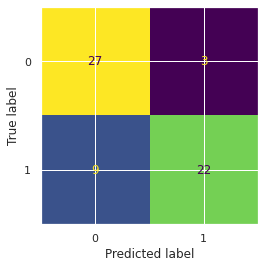

In [46]:
print(classification_report(Y_test, y_pred_NB_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_NB_balanced, colorbar=False)

### Support Vector Machine

In [47]:
SVM_classifier_balanced = SVC()
SVM_classifier_balanced.fit(X_train, Y_train)
y_pred_SVM_balanced = SVM_classifier_balanced.predict(X_test)

In [48]:
y_pred_SVM_train_balanced = SVM_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_SVM_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_SVM_balanced))

Accuracy of the training set:  0.9083333333333333
Accuracy of the testing set:  0.8688524590163934


In [49]:
print(classification_report(Y_test, y_pred_SVM_balanced))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       1.00      0.74      0.85        31

    accuracy                           0.87        61
   macro avg       0.89      0.87      0.87        61
weighted avg       0.90      0.87      0.87        61



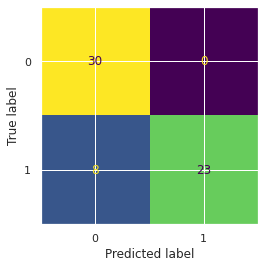

In [50]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_SVM_balanced, colorbar=False)

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
LR_classifier_balanced = LogisticRegression()
LR_classifier_balanced.fit(X_train, Y_train)
LR_classifier_balanced.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
y_pred_LR_balanced = LR_classifier_balanced.predict(X_test)
y_pred_LR_train_balanced = LR_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_LR_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_LR_balanced))

Accuracy of the training set:  0.8416666666666667
Accuracy of the testing set:  0.8524590163934426


In [53]:
print(classification_report(Y_test, y_pred_LR_balanced))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.92      0.77      0.84        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



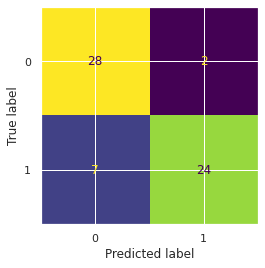

In [54]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_LR_balanced, colorbar=False)

### Decision Tree Classifier

We limit the *max_depth* since this is a small dataset, in order to avoid overfitting.

In [55]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier_balanced = DecisionTreeClassifier(max_depth = 4)
DT_classifier_balanced.fit(X_train, Y_train)
DT_classifier_balanced.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [56]:
y_pred_DT_balanced = DT_classifier_balanced.predict(X_test)
y_pred_DT_train_balanced = DT_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_DT_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_DT_balanced))

Accuracy of the training set:  0.9375
Accuracy of the testing set:  0.8360655737704918


              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.86      0.81      0.83        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



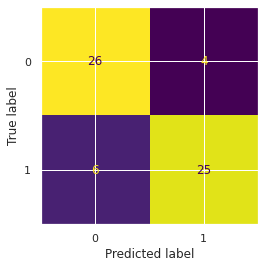

In [57]:
print(classification_report(Y_test, y_pred_DT_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_DT_balanced, colorbar=False)

### Random Forest Classifier

We limit the max_depth since this is a small dataset, in order to avoid overfitting.

In [58]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier_balanced = RandomForestClassifier(max_depth=4)
RF_classifier_balanced.fit(X_train, Y_train)
RF_classifier_balanced.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [59]:
y_pred_RF_balanced = RF_classifier_balanced.predict(X_test)
y_pred_RF_train_balanced = RF_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_RF_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_RF_balanced))

Accuracy of the training set:  0.9583333333333334
Accuracy of the testing set:  0.9344262295081968


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.87      0.93        31

    accuracy                           0.93        61
   macro avg       0.94      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



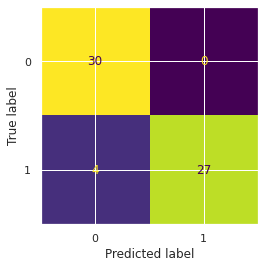

In [60]:
print(classification_report(Y_test, y_pred_RF_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_RF_balanced, colorbar=False)

### AdaBoost Classifier

We limit the learning_rate, since it can lead to overfitting.

In [61]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_balanced = AdaBoostClassifier(learning_rate=0.01)
adaboost_balanced.fit(X_train, Y_train)
adaboost_balanced.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.01,
 'n_estimators': 50,
 'random_state': None}

In [62]:
y_pred_Adaboost_balanced = adaboost_balanced.predict(X_test)
print('Accuracy of the training set: ', adaboost_balanced.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_Adaboost_balanced))

Accuracy of the training set:  0.8166666666666667
Accuracy of the testing set:  0.7868852459016393


              precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.85      0.71      0.77        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



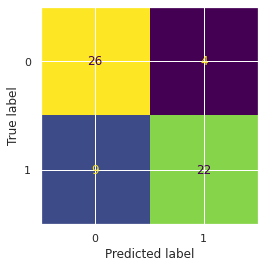

In [63]:
print(classification_report(Y_test, y_pred_Adaboost_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_Adaboost_balanced, colorbar=False)

### XGBoost Classifier

We limit the n_estimators and the learning_rate.

In [64]:
from xgboost import XGBClassifier
xgb_classifier_balanced = XGBClassifier(n_estimators=50, learning_rate = 0.05)
xgb_classifier_balanced.fit(X_train, Y_train)
xgb_classifier_balanced.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 50,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [65]:
y_pred_XGB_balanced = xgb_classifier_balanced.predict(X_test)
print('Accuracy of the training set: ', xgb_classifier_balanced.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_XGB_balanced))

Accuracy of the training set:  0.9875
Accuracy of the testing set:  0.9672131147540983


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.94      0.97        31

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



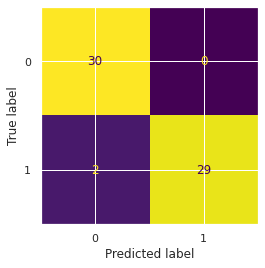

In [66]:
print(classification_report(Y_test, y_pred_XGB_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_XGB_balanced, colorbar=False)

### Voting Classifier

In [67]:
from sklearn.ensemble import VotingClassifier

VC = VotingClassifier(estimators = [('kNN', kNN_classifier_balanced), ('NB', NB_classifier_balanced), ('SVM', SVM_classifier_balanced),
                                    ('LR', LR_classifier_balanced), ('DT', DT_classifier_balanced), ('RF', RF_classifier_balanced), 
                                    ('Adaboost', adaboost_balanced), ('XGB', xgb_classifier_balanced)], voting = 'hard')
VC.fit(X_train_PCA, Y_train)
VC.get_params()

{'estimators': [('kNN', KNeighborsClassifier()),
  ('NB', BernoulliNB()),
  ('SVM', SVC()),
  ('LR', LogisticRegression()),
  ('DT', DecisionTreeClassifier(max_depth=4)),
  ('RF', RandomForestClassifier(max_depth=4)),
  ('Adaboost', AdaBoostClassifier(learning_rate=0.01)),
  ('XGB', XGBClassifier(learning_rate=0.05, n_estimators=50))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'kNN': KNeighborsClassifier(),
 'NB': BernoulliNB(),
 'SVM': SVC(),
 'LR': LogisticRegression(),
 'DT': DecisionTreeClassifier(max_depth=4),
 'RF': RandomForestClassifier(max_depth=4),
 'Adaboost': AdaBoostClassifier(learning_rate=0.01),
 'XGB': XGBClassifier(learning_rate=0.05, n_estimators=50),
 'kNN__algorithm': 'auto',
 'kNN__leaf_size': 30,
 'kNN__metric': 'minkowski',
 'kNN__metric_params': None,
 'kNN__n_jobs': None,
 'kNN__n_neighbors': 5,
 'kNN__p': 2,
 'kNN__weights': 'uniform',
 'NB__alpha': 1.0,
 'NB__binarize': 0.0,
 'NB__class_prior': None,

In [68]:
y_pred_VC_balanced = VC.predict(X_test)
print('Accuracy of the training set: ', VC.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_VC_balanced))

Accuracy of the training set:  0.8333333333333334
Accuracy of the testing set:  0.8032786885245902


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        30
           1       1.00      0.61      0.76        31

    accuracy                           0.80        61
   macro avg       0.86      0.81      0.80        61
weighted avg       0.86      0.80      0.80        61



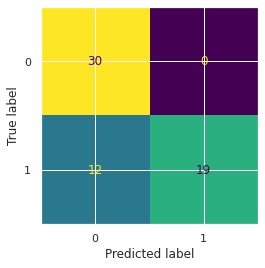

In [69]:
print(classification_report(Y_test, y_pred_VC_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_VC_balanced, colorbar=False)

### Accuracy

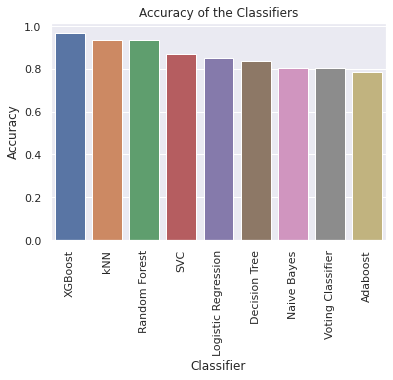

In [70]:
accuracy_df = pd.DataFrame()
accuracy_df['Classifier'] = ['Decision Tree', 'kNN', 'Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest', 'Adaboost', 
                             'XGBoost', 'Voting Classifier']
accuracy_df['Accuracy'] = [accuracy_score(Y_test, y_pred_DT_balanced), accuracy_score(Y_test, y_pred_kNN_balanced), 
                           accuracy_score(Y_test, y_pred_NB_balanced), accuracy_score(Y_test, y_pred_SVM_balanced), 
                           accuracy_score(Y_test, y_pred_LR_balanced), accuracy_score(Y_test, y_pred_RF_balanced),
                           accuracy_score(Y_test, y_pred_Adaboost_balanced), accuracy_score(Y_test, y_pred_XGB_balanced), 
                           accuracy_score(Y_test, y_pred_VC_balanced)]

sns.barplot(y = 'Accuracy', x = 'Classifier', data = accuracy_df, order = accuracy_df.sort_values('Accuracy', ascending = False).Classifier)
plt.title('Accuracy of the Classifiers')
plt.xticks(rotation=90)
plt.show()

XGBoost Classifier produces the highest accuracy at about 95% of the algorithms implemented upon balancing the target class. It is closely followed by kNN and Random Forest Classifiers which also have an accuracy close to 90%.

### ROC Curve

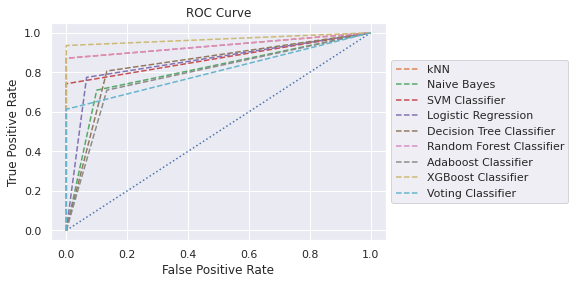

In [71]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(Y_test, y_pred_kNN_balanced)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(Y_test, y_pred_NB_balanced)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(Y_test, y_pred_SVM_balanced)
plt.plot(fpr3, tpr3, '--', label='SVM Classifier')
fpr4, tpr4, thresholds = roc_curve(Y_test, y_pred_LR_balanced)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(Y_test, y_pred_DT_balanced)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(Y_test, y_pred_RF_balanced)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')
fpr7, tpr7, thresholds = roc_curve(Y_test, y_pred_Adaboost_balanced)
plt.plot(fpr7, tpr7, '--', label='Adaboost Classifier')
fpr8, tpr8, thresholds = roc_curve(Y_test, y_pred_XGB_balanced)
plt.plot(fpr8, tpr8, '--', label='XGBoost Classifier')
fpr9, tpr9, thresholds = roc_curve(Y_test, y_pred_VC_balanced)
plt.plot(fpr9, tpr9, '--', label='Voting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

Random Forest Classifier, kNN and XGBoost Classifier easily stands out from the rest of the algorithms on the ROC Curve - they are almost perfect! We can thus choose Random Forest Classifier for the case where the target class is balanced.

## Conclusion

In healthcare, we have to take the False Positives and Negatives into account, since they can either have significant consequences on the society as a whole or on the patients themselves. Thus, accuracy alone cannot be used to judge a classifier's performance - we must also take into account the impact and the consequences that our model will have to face if we deploy it in the real-world. 

In this particular case, XGBoost Classifier works best among the classifiers we have implemented. However, it is still not a perfect classifier and we have to investigate the performance of the classifier further on newer test data to understand its limits.

## Miscellaneous - LazyPredict Library

You may need to install the LazyPredict Library if you have not already done so:


```
!pip install lazypredict
```



In [72]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [73]:
lazypredict_classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None, random_state = 42)
model, predictions = lazypredict_classifier.fit(X_train_PCA, X_test_PCA, Y_train, Y_test)
model

100%|██████████| 29/29 [00:01<00:00, 15.96it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.97,0.97,0.97,0.97,0.08
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.25
LGBMClassifier,0.95,0.95,0.95,0.95,0.09
RandomForestClassifier,0.95,0.95,0.95,0.95,0.34
LabelSpreading,0.95,0.95,0.95,0.95,0.06
LabelPropagation,0.95,0.95,0.95,0.95,0.05
KNeighborsClassifier,0.93,0.94,0.94,0.93,0.02
BaggingClassifier,0.93,0.93,0.93,0.93,0.12
AdaBoostClassifier,0.92,0.92,0.92,0.92,0.17


We see that XGBoost and Random Forest Classifiers are amongst the top three, which is also the case when we have manually implemented them.